# Introduction to Keras: Extras

The "blobs" dataset is a very easy one, but we can learn important things from easy datasets. Below we explore how to make the dataset a bit harder.


In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from keras.utils import np_utils

/Users/pumpikano/deeplearn2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


The `make_blobs` function has a handful of useful inputs:
* `n_samples` determines the number of points
* `centers` is a list of coordinates for each of the classes
* `cluster_std` is the standard deviation around the centers used to randomly generate the data
* `n_features` is the dimension of the data points

Here is what we used before:

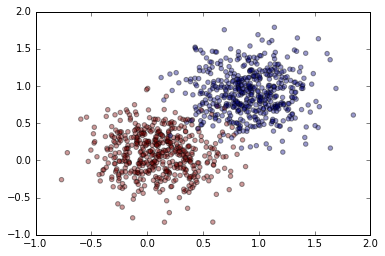

In [2]:
X, y = make_blobs(n_samples=1000,
                  centers=[[0.1, 0.1],[0.9, 0.9]],
                  cluster_std=0.3,
                  n_features=2)

y = np_utils.to_categorical(y)
plt.scatter(X[:,0], X[:,1], c=y[:,0], alpha=0.4)

- - -
### Exercise 1

Try changing the `centers` and `cluster_std` below to make the dataset harder or easier. What does "harder" mean in this context?
- - -

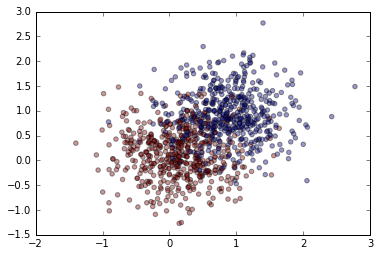

In [3]:
# Make the dataset "harder" and plot it
X, y = make_blobs(n_samples=1000,
                  centers=[[0.1, 0.1],[0.9, 0.9]],
                  cluster_std=0.5,
                  n_features=2)

y = np_utils.to_categorical(y)
plt.scatter(X[:,0], X[:,1], c=y[:,0], alpha=0.4)

- - -
### Exercise 2

Build a Keras model and train it on a few different versions of the dataset, both really easy and really hard versions. The decision boundary function is copies below for you to visualize the model's solutions.
- - -

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from sklearn.cross_validation import train_test_split

def plot_decision_boundary(model, X, y):
    X_max = X.max(axis=0)
    X_min = X.min(axis=0)
    xticks = np.linspace(X_min[0], X_max[0], 100)
    yticks = np.linspace(X_min[1], X_max[1], 100)
    xx, yy = np.meshgrid(xticks,
                         yticks)
    ZZ = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = ZZ[:,0] >= 0.5
    Z = Z.reshape(xx.shape)
    fig, ax = plt.subplots()
    ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.2)
    ax.scatter(X[:,0], X[:,1], c=y[:,0], alpha=0.4)

Using TensorFlow backend.


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = Sequential()
model.add(Dense(2, input_dim=2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.04),
              metrics=['accuracy'])

model.fit(X_train, y_train, nb_epoch=20, batch_size=16)

Epoch 1/20
750/750 [==============================] - 0s - loss: 0.8590 - acc: 0.3093     
Epoch 2/20
750/750 [==============================] - 0s - loss: 0.5933 - acc: 0.7013     
Epoch 3/20
750/750 [==============================] - 0s - loss: 0.5035 - acc: 0.8173     
Epoch 4/20
750/750 [==============================] - 0s - loss: 0.4526 - acc: 0.8467     
Epoch 5/20
750/750 [==============================] - 0s - loss: 0.4193 - acc: 0.8467     
Epoch 6/20
750/750 [==============================] - 0s - loss: 0.3966 - acc: 0.8587     
Epoch 7/20
750/750 [==============================] - 0s - loss: 0.3800 - acc: 0.8600     
Epoch 8/20
750/750 [==============================] - 0s - loss: 0.3679 - acc: 0.8587     
Epoch 9/20
750/750 [==============================] - 0s - loss: 0.3587 - acc: 0.8560     
Epoch 10/20
750/750 [==============================] - 0s - loss: 0.3512 - acc: 0.8573     
Epoch 11/20
750/750 [==============================] - 0s - loss: 0.3452 - acc: 0.8573   